# Klasifikasi Brita

Klasifikasi berita adalah proses menggunakan teknik kecerdasan buatan atau pembelajaran mesin (machine learning) untuk mengelompokkan artikel berita ke dalam kategori tertentu secara otomatis. Kategori ini bisa berupa topik seperti “politik”, “ekonomi”, “olahraga”, “teknologi”, dan sebagainya. Dalam konteks machine learning, klasifikasi merupakan salah satu jenis masalah di mana model belajar dari data yang telah diberi label dan kemudian digunakan untuk memprediksi label pada data baru.

Berikut adalah langkah-langkah umum dalam klasifikasi berita:

1. Pengumpulan Data: Langkah pertama adalah mengumpulkan data berita, biasanya berupa teks yang berisi judul, isi berita, dan informasi lainnya. Setiap berita diberi label berdasarkan kategorinya.

2. Pra-pemrosesan Data: Data teks perlu diubah menjadi bentuk yang dapat dimengerti oleh algoritma machine learning. Beberapa langkah pra-pemrosesan yang umum dilakukan adalah:

 - Tokenisasi: Memecah teks menjadi kata-kata individu atau token.

 - Penghapusan Stop Words: Menghapus kata-kata umum yang tidak memiliki banyak makna seperti “dan”, “di”, “yang”, dsb.

 - Stemming atau Lemmatization: Mengubah kata ke bentuk dasar (misalnya “running” menjadi “run”).

 - Representasi Vektor: Teks diubah menjadi representasi numerik menggunakan metode seperti Bag of Words (BoW) atau Term Frequency-Inverse Document Frequency (TF-IDF).

3. Pemilihan Model: Dalam kasus ini, Anda menggunakan logistic regression, salah satu algoritma klasik yang sederhana namun efektif untuk klasifikasi. Logistic regression bekerja dengan memodelkan hubungan antara fitur input (vektor yang mewakili berita) dan probabilitas suatu berita termasuk ke dalam kategori tertentu.

3. Pelatihan Model: Data yang telah diproses digunakan untuk melatih model logistic regression. Model akan mempelajari pola dari teks berita yang berhubungan dengan setiap kategori.

4. Evaluasi Model: Model yang telah dilatih diuji pada data baru untuk mengukur performanya. Metrik umum yang digunakan dalam klasifikasi termasuk:

 - Akurasi: Proporsi berita yang diklasifikasikan dengan benar.

 - Precision dan Recall: Digunakan untuk mengevaluasi performa model dalam situasi di mana data tidak seimbang (misalnya, kategori tertentu lebih banyak dibanding yang lain).

 - F1-Score: Gabungan dari precision dan recall.

6. Prediksi: Setelah model dilatih dan diuji, ia dapat digunakan untuk memprediksi kategori berita baru yang belum diberi label. Model akan memberikan probabilitas setiap berita berada dalam kategori tertentu, dan kategori dengan probabilitas tertinggi akan dipilih sebagai hasil prediksi.

# Logistic Regression
Logistic regression adalah salah satu algoritma dalam pembelajaran mesin yang digunakan untuk memodelkan hubungan antara variabel input (fitur) dengan variabel output yang bersifat biner atau kategori. Meskipun disebut “regresi”, logistic regression sebenarnya digunakan untuk masalah klasifikasi, bukan regresi. Logistic regression memprediksi probabilitas suatu kejadian masuk dalam salah satu dari dua kategori.

# Implementasi

## Library yang digunakan

In [ ]:
!pip install gdown

In [ ]:
!pip install Sastrawi

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SLM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Nama file yang akan dibaca
file_name = 'kompas.csv'

# Membaca file CSV dari folder lokal
df = pd.read_csv(file_name)

# Tampilkan beberapa baris pertama dari file CSV
print(df.head())

                                               judul  \
0  MotoGP San Marino 2024: Ketika Marquez Menang ...   
1  Klasemen PON XXI 2024: Futsal Gagal Emas, Jati...   
2  Hasil One Pride MMA 82: Frans Sormin Bekuk Jak...   
3  Indonesia Vs Australia, Kata Manajer Timnas so...   
4  Dampak Kehadiran Marteen Paes untuk Persaingan...   

                      waktu  \
0   - 09/09/2024, 05:00 WIB   
1   - 09/09/2024, 07:59 WIB   
2   - 09/09/2024, 14:31 WIB   
3   - 09/09/2024, 10:29 WIB   
4   - 09/09/2024, 11:30 WIB   

                                                 url  \
0  https://www.kompas.com/motogp/read/2024/09/09/...   
1  https://www.kompas.com/sports/read/2024/09/09/...   
2  https://www.kompas.com/sports/read/2024/09/09/...   
3  https://bola.kompas.com/read/2024/09/09/102929...   
4  https://bola.kompas.com/read/2024/09/09/113000...   

                                              konten kategori  
0  KOMPAS.com - Marc Marquez sukses memenangi Mot...     Bola  
1  KOMPAS.c

### Dataset

In [ ]:
df

,judul,waktu,url,konten,kategori
0,MotoGP San Marino 2024: Ketika Marquez Menang ...,"- 09/09/2024, 05:00 WIB",https://www.kompas.com/motogp/read/2024/09/09/...,KOMPAS.com - Marc Marquez sukses memenangi Mot...,Bola
1,"Klasemen PON XXI 2024: Futsal Gagal Emas, Jati...","- 09/09/2024, 07:59 WIB",https://www.kompas.com/sports/read/2024/09/09/...,KOMPAS.com - Tim futsal Jawa Timur (Jatim) gag...,Bola
2,Hasil One Pride MMA 82: Frans Sormin Bekuk Jak...,"- 09/09/2024, 14:31 WIB",https://www.kompas.com/sports/read/2024/09/09/...,KOMPAS.com - Frans Lincol Sormin mengalahkan J...,Bola
3,"Indonesia Vs Australia, Kata Manajer Timnas so...","- 09/09/2024, 10:29 WIB",https://bola.kompas.com/read/2024/09/09/102929...,KOMPAS.com - Timnas Indonesia belum menentukan...,Bola
4,Dampak Kehadiran Marteen Paes untuk Persaingan...,"- 09/09/2024, 11:30 WIB",https://bola.kompas.com/read/2024/09/09/113000...,KOMPAS.com - Penampilan penjaga gawang timnas ...,Bola
...,...,...,...,...,...
146,Penurunan Apa Saja yang Terjadi pada Lansia? I...,"- 05/09/2024, 18:00 WIB",https://health.kompas.com/read/24I05180000468/...,"KOMPAS.com - Seiring bertambahnya umur, setiap...",Health
147,Apakah Minum Kopi Pahit Bagus untuk Kesehatan?...,"- 05/09/2024, 16:00 WIB",https://health.kompas.com/read/24I05160000768/...,KOMPAS.com - Kopi kerap diminum untuk mengatas...,Health
148,"Sering Digunakan untuk Diet, Ini Manfaat Keseh...","- 05/09/2024, 13:37 WIB",https://health.kompas.com/read/24I05133717468/...,"KOMPAS.com - Dalam beberapa tahun terakhir, cu...",Health
149,"Kenali ""BEACH"", Akronim untuk Tanda Peringatan...","- 05/09/2024, 14:00 WIB",https://health.kompas.com/read/24I05140000068/...,KOMPAS.com - Gejala kanker ovarium sering kali...,Health


### Jumlah Dataset Per Label

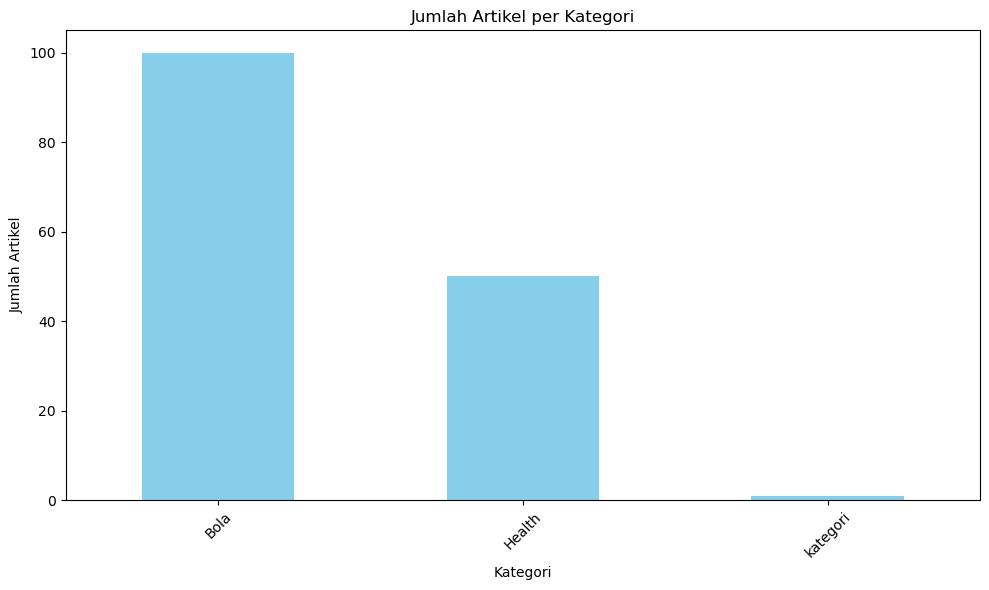

In [ ]:
# Hitung jumlah artikel per kategori
category_counts = df['kategori'].value_counts()

# Tampilkan grafik batang
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Artikel per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns = 'kategori')
Y = df['kategori']

#### Label Encoder

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the labels
df['kategori'] = label_encoder.fit_transform(df['kategori'])
print("\nEncoded Labels:")
df


Encoded Labels:


,judul,waktu,url,konten,kategori
0,MotoGP San Marino 2024: Ketika Marquez Menang ...,"- 09/09/2024, 05:00 WIB",https://www.kompas.com/motogp/read/2024/09/09/...,KOMPAS.com - Marc Marquez sukses memenangi Mot...,0
1,"Klasemen PON XXI 2024: Futsal Gagal Emas, Jati...","- 09/09/2024, 07:59 WIB",https://www.kompas.com/sports/read/2024/09/09/...,KOMPAS.com - Tim futsal Jawa Timur (Jatim) gag...,0
2,Hasil One Pride MMA 82: Frans Sormin Bekuk Jak...,"- 09/09/2024, 14:31 WIB",https://www.kompas.com/sports/read/2024/09/09/...,KOMPAS.com - Frans Lincol Sormin mengalahkan J...,0
3,"Indonesia Vs Australia, Kata Manajer Timnas so...","- 09/09/2024, 10:29 WIB",https://bola.kompas.com/read/2024/09/09/102929...,KOMPAS.com - Timnas Indonesia belum menentukan...,0
4,Dampak Kehadiran Marteen Paes untuk Persaingan...,"- 09/09/2024, 11:30 WIB",https://bola.kompas.com/read/2024/09/09/113000...,KOMPAS.com - Penampilan penjaga gawang timnas ...,0
...,...,...,...,...,...
146,Penurunan Apa Saja yang Terjadi pada Lansia? I...,"- 05/09/2024, 18:00 WIB",https://health.kompas.com/read/24I05180000468/...,"KOMPAS.com - Seiring bertambahnya umur, setiap...",1
147,Apakah Minum Kopi Pahit Bagus untuk Kesehatan?...,"- 05/09/2024, 16:00 WIB",https://health.kompas.com/read/24I05160000768/...,KOMPAS.com - Kopi kerap diminum untuk mengatas...,1
148,"Sering Digunakan untuk Diet, Ini Manfaat Keseh...","- 05/09/2024, 13:37 WIB",https://health.kompas.com/read/24I05133717468/...,"KOMPAS.com - Dalam beberapa tahun terakhir, cu...",1
149,"Kenali ""BEACH"", Akronim untuk Tanda Peringatan...","- 05/09/2024, 14:00 WIB",https://health.kompas.com/read/24I05140000068/...,KOMPAS.com - Gejala kanker ovarium sering kali...,1


### Preprocessing

#### Lower Case

Tahapan pertama yang biasanya dilakukan adalah tahapan case folding. Tahapan ini hampir selalu disertakan ketika melakukan text preprocessing. Mengapa? Karena data yang kita miliki tidak selalu terstruktur dan konsisten dalam penggunaan huruf kapital. Jadi, peran dari case folding adalah untuk menyamaratakan penggunaan huruf kapital. Misalnya data teks yang kita dapat berupa tulisan "DaTA SCIence" maka dengan case folding artinya kita mengubah semua huruf menjadi huruf kecil (lowercase) semua. Sementara itu, karakter lain yang bukan termasuk huruf dan angka, seperti tanda baca dan spasi dianggap sebagai delimiter. Delimiter ini bisa juga dihapus atau diabaikan dengan menggunakan perintah yang ada di Python.

In [ ]:
df['lower_text'] = df['konten'].str.lower()

df[['konten', 'lower_text']]

,konten,lower_text
0,KOMPAS.com - Marc Marquez sukses memenangi Mot...,kompas.com - marc marquez sukses memenangi mot...
1,KOMPAS.com - Tim futsal Jawa Timur (Jatim) gag...,kompas.com - tim futsal jawa timur (jatim) gag...
2,KOMPAS.com - Frans Lincol Sormin mengalahkan J...,kompas.com - frans lincol sormin mengalahkan j...
3,KOMPAS.com - Timnas Indonesia belum menentukan...,kompas.com - timnas indonesia belum menentukan...
4,KOMPAS.com - Penampilan penjaga gawang timnas ...,kompas.com - penampilan penjaga gawang timnas ...
...,...,...
146,"KOMPAS.com - Seiring bertambahnya umur, setiap...","kompas.com - seiring bertambahnya umur, setiap..."
147,KOMPAS.com - Kopi kerap diminum untuk mengatas...,kompas.com - kopi kerap diminum untuk mengatas...
148,"KOMPAS.com - Dalam beberapa tahun terakhir, cu...","kompas.com - dalam beberapa tahun terakhir, cu..."
149,KOMPAS.com - Gejala kanker ovarium sering kali...,kompas.com - gejala kanker ovarium sering kali...


#### Cleansing Text

Data cleansing atau data cleaning merupakan suatu proses mendeteksi dan memperbaiki (atau menghapus) suatu record yang ‘corrupt’ atau tidak akurat berdasarkan sebuah record set, tabel, atau database. Selain itu, data cleansing juga berguna untuk mengidentifikasi bagian data mana yang tidak lengkap, tidak tepat, tidak akurat atau tidak relevan, yang selanjutnya untuk data-data “kotor” tersebut akan diganti, dimodifikasi, atau dihapus

In [ ]:
df['cleaned_text'] = df['lower_text'].apply(lambda text: re.sub(r'\W', ' ', text))

df[['lower_text', 'cleaned_text']]

,lower_text,cleaned_text
0,kompas.com - marc marquez sukses memenangi mot...,kompas com marc marquez sukses memenangi mot...
1,kompas.com - tim futsal jawa timur (jatim) gag...,kompas com tim futsal jawa timur jatim gag...
2,kompas.com - frans lincol sormin mengalahkan j...,kompas com frans lincol sormin mengalahkan j...
3,kompas.com - timnas indonesia belum menentukan...,kompas com timnas indonesia belum menentukan...
4,kompas.com - penampilan penjaga gawang timnas ...,kompas com penampilan penjaga gawang timnas ...
...,...,...
146,"kompas.com - seiring bertambahnya umur, setiap...",kompas com seiring bertambahnya umur setiap...
147,kompas.com - kopi kerap diminum untuk mengatas...,kompas com kopi kerap diminum untuk mengatas...
148,"kompas.com - dalam beberapa tahun terakhir, cu...",kompas com dalam beberapa tahun terakhir cu...
149,kompas.com - gejala kanker ovarium sering kali...,kompas com gejala kanker ovarium sering kali...


#### Tokenisasi

Kita ambil contoh adalah data tweet atau kumpulan dataset pesan spam pasti terdiri dari kalimat. Nah, untuk memudahkan proses analisis data kita harus memecah kalimat-kalimat tersebut menjadi kata atau disebut dengan token. Dengan tokenizing kita dapat membedakan mana antara pemisah kata atau bukan. Jika menggunakan bahasa pemrograman python biasanya tokenizing juga mencakup proses removing number, removing punctuation seperti simbol dan tanda baca yang tidak penting, serta removing whitespace. Selain itu tokenizing juga akan merujuk pada NLTK, tetapi yang sangat disayangkan adalah NLTK belum support bahasa Indonesia. Tapi, jangan khawatir karena kita masih bisa menggunakan modul sastrawi.

In [ ]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda text: text.split())

df[['cleaned_text', 'tokenized_text']]

,cleaned_text,tokenized_text
0,kompas com marc marquez sukses memenangi mot...,"[kompas, com, marc, marquez, sukses, memenangi..."
1,kompas com tim futsal jawa timur jatim gag...,"[kompas, com, tim, futsal, jawa, timur, jatim,..."
2,kompas com frans lincol sormin mengalahkan j...,"[kompas, com, frans, lincol, sormin, mengalahk..."
3,kompas com timnas indonesia belum menentukan...,"[kompas, com, timnas, indonesia, belum, menent..."
4,kompas com penampilan penjaga gawang timnas ...,"[kompas, com, penampilan, penjaga, gawang, tim..."
...,...,...
146,kompas com seiring bertambahnya umur setiap...,"[kompas, com, seiring, bertambahnya, umur, set..."
147,kompas com kopi kerap diminum untuk mengatas...,"[kompas, com, kopi, kerap, diminum, untuk, men..."
148,kompas com dalam beberapa tahun terakhir cu...,"[kompas, com, dalam, beberapa, tahun, terakhir..."
149,kompas com gejala kanker ovarium sering kali...,"[kompas, com, gejala, kanker, ovarium, sering,..."


#### Stopword Removal

Stopword adalah kata-kata yang sering muncul dalam suatu bahasa yang sering dihilangkan dari tugas pemrosesan bahasa alami (NLP) karena tidak terlalu penting dalam mengartikan makna tekstual. Daftar stopword tertentu dapat berubah berdasarkan bahasa yang dipelajari dan konteksnya. Berikut ini adalah daftar umum kategori stopword:

 - Stopword Umum: Ini adalah kata-kata yang paling sering muncul dalam suatu bahasa dan sering dihilangkan selama praproses teks. Contohnya termasuk “the,” “is,” “in,” “for,” “where,” “when,” “to,” “at,” dll.
 - Stopword Kustom: Bergantung pada tugas atau domain tertentu, kata-kata tambahan dapat dianggap sebagai stopword. Ini bisa berupa istilah khusus domain yang tidak banyak berkontribusi pada makna keseluruhan. Misalnya, dalam konteks medis, kata-kata seperti "pasien" atau "perawatan" dapat dianggap sebagai stopword kustom.
 - Stopword Numerik: Angka dan karakter numerik dapat dianggap sebagai stopword dalam kasus tertentu, khususnya ketika analisis terfokus pada makna teks dan bukan pada nilai numerik tertentu.
 - Stopword Karakter Tunggal: Karakter tunggal, seperti “a,” “I,” “s,” atau “x,” dapat dianggap sebagai stopword, khususnya dalam kasus di mana karakter tersebut tidak menyampaikan banyak makna dengan sendirinya.
 - Kata-kata Penghenti Kontekstual: Kata-kata yang merupakan kata-kata penghenti dalam satu konteks tetapi bermakna dalam konteks lain dapat dianggap sebagai kata-kata penghenti kontekstual. Misalnya, kata "akan" mungkin merupakan kata-kata penghenti dalam konteks menerjemahkan bahasa umum tetapi dapat menjadi penting dalam memprediksi kejadian di masa mendatang.

In [ ]:
stop_words = set(stopwords.words('indonesian'))

df['no_stopwords_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

df[['tokenized_text', 'no_stopwords_text']]

,tokenized_text,no_stopwords_text
0,"[kompas, com, marc, marquez, sukses, memenangi...","[kompas, com, marc, marquez, sukses, memenangi..."
1,"[kompas, com, tim, futsal, jawa, timur, jatim,...","[kompas, com, tim, futsal, jawa, timur, jatim,..."
2,"[kompas, com, frans, lincol, sormin, mengalahk...","[kompas, com, frans, lincol, sormin, mengalahk..."
3,"[kompas, com, timnas, indonesia, belum, menent...","[kompas, com, timnas, indonesia, menentukan, w..."
4,"[kompas, com, penampilan, penjaga, gawang, tim...","[kompas, com, penampilan, penjaga, gawang, tim..."
...,...,...
146,"[kompas, com, seiring, bertambahnya, umur, set...","[kompas, com, seiring, bertambahnya, umur, ora..."
147,"[kompas, com, kopi, kerap, diminum, untuk, men...","[kompas, com, kopi, kerap, diminum, mengatasi,..."
148,"[kompas, com, dalam, beberapa, tahun, terakhir...","[kompas, com, cuka, apel, madu, pilihan, popul..."
149,"[kompas, com, gejala, kanker, ovarium, sering,...","[kompas, com, gejala, kanker, ovarium, kali, m..."


#### Stemming

Tahap stemming adalah tahapan yang juga diperlukan untuk memperkecil jumlah indeks yang berbeda dari satu data sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali ke bentuk dasarnya. Selain itu juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula. Di library NLTK juga sudah tersedia modul untuk proses stemming antara lain, porter, lancester, wordnet, dan snowball. Tapi, kembali lagi modul-modul tersebut belum support untuk text berbahasa Indonesia.

In [ ]:
# Membuat objek Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menggunakan Sastrawi untuk stemming teks
df['stemmed_text'] = df['no_stopwords_text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df['final_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))

df[['no_stopwords_text', 'final_text']]

,no_stopwords_text,final_text
0,"[kompas, com, marc, marquez, sukses, memenangi...",kompas com marc marquez sukses tang motogp san...
1,"[kompas, com, tim, futsal, jawa, timur, jatim,...",kompas com tim futsal jawa timur jatim gagal r...
2,"[kompas, com, frans, lincol, sormin, mengalahk...",kompas com frans lincol sormin kalah jaka naib...
3,"[kompas, com, timnas, indonesia, menentukan, w...",kompas com timnas indonesia tentu warna jersey...
4,"[kompas, com, penampilan, penjaga, gawang, tim...",kompas com tampil jaga gawang timnas indonesia...
...,...,...
146,"[kompas, com, seiring, bertambahnya, umur, ora...",kompas com iring tambah umur orang alami turun...
147,"[kompas, com, kopi, kerap, diminum, mengatasi,...",kompas com kopi kerap minum atas kantuk minum ...
148,"[kompas, com, cuka, apel, madu, pilihan, popul...",kompas com cuka apel madu pilih populer kalang...
149,"[kompas, com, gejala, kanker, ovarium, kali, m...",kompas com gejala kanker ovarium kali muncul s...


In [ ]:
x = df['konten'].values
y = df['kategori'].values

#### Split Data

In [ ]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=2)

### TF-IDF

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(Xtrain)

X_array = vect.transform(Xtrain)

In [ ]:
X_array.toarray()

array([[0.        , 0.        , 0.01719503, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0155655 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01550865, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
fitur_kata = vect.get_feature_names_out()

print("Jumlah fitur kata dari hasil TF-IDF:", len(fitur_kata))

Jumlah fitur kata dari hasil TF-IDF: 5672


In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)  # Menyimpan vectorizer
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(X, f)  # Menyimpan hasil transformasi (TF-IDF matrix)

### Melatih Model Logistic Regression

In [ ]:
# Membuat model Logistic Regression
model = LogisticRegression()

# Melatih model dengan data pelatihan
model.fit(X, Ytrain)

LogisticRegression()

In [ ]:
# Save the model to a file using pickle
with open('logistic_model', 'wb') as f:
    pickle.dump(model, f)

#### Testing Data Baru

In [ ]:
# Load TF-IDF dan model logistic regression dari file pickle
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)


In [ ]:
with open("logistic_model", "rb") as f:
    model = pickle.load(f)

In [ ]:
# Transformasi data baru dengan TF-IDF yang sudah dilatih
X_baru = tfidf_vectorizer.transform(Xtest)

# Lakukan prediksi dengan model logistic regression
prediksi = model.predict(X_baru)

#### Akurasi

In [ ]:
# Tampilkan hasil prediksi
print("Prediksi:", prediksi)

Prediksi: [0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0]


In [ ]:
accuracy = accuracy_score(Ytest, prediksi)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 96.77%
